In [160]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv('BlackFriday.csv')

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [10]:
del df['Product_Category_2']
del df['Product_Category_3']

# Analyzing columns

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [13]:
df['User_ID'].nunique()

5891

In [14]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [15]:
df['Product_ID'].nunique()

3623

In [16]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

In [18]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [21]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [22]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [23]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [24]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [25]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [27]:
df['Purchase'].sum()

5017668378

In [28]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [39]:
for i in df.columns:
    print(i,df[i].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


#Analyzing Gender

In [43]:
len(df[df['Gender'] == 'M']), len(df[df['Gender'] == "F"])

(405380, 132197)

In [56]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])

In [64]:
data

,Ratio
Male,405380
Female,132197


#ploting Graphs

<AxesSubplot:ylabel='Ratio'>

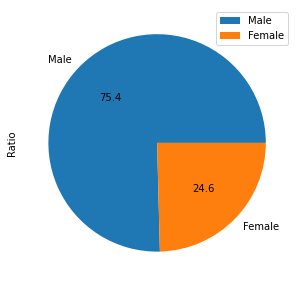

In [63]:
data.plot.pie( y = "Ratio", figsize = (5,5), autopct = "%.01f")

#Another Method

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='None'>

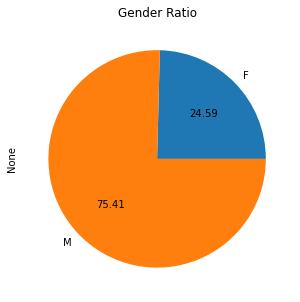

In [79]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                 figsize = (5,5), 
                                 autopct = "%0.2f", 
                                 title = "Gender Ratio")

<AxesSubplot:title={'center':'Gender Ratio'}, xlabel='Gender'>

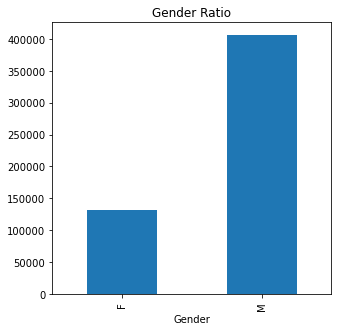

In [81]:
df.groupby('Gender').size().plot(kind = 'bar',
                                 figsize = (5,5),
                                 title = "Gender Ratio")


<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='Purchase'>

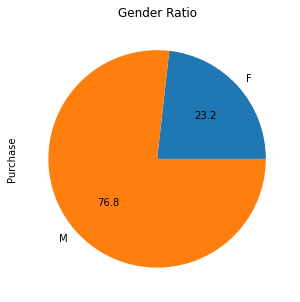

In [90]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', figsize = (5,5),autopct= "%.1f",title = "Gender Ratio")

#Finding Mean

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='Purchase'>

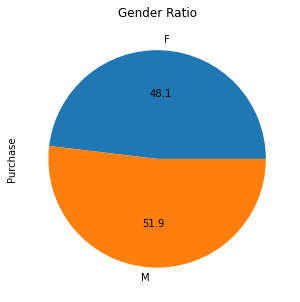

In [91]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', figsize = (5,5),autopct= "%.1f",title = "Gender Ratio")

# Analysing Age & Marital Status



In [137]:
lst = []
for i in df['Age'].unique():
    lst.append([i,df[df['Age']== i]['Product_ID'].nunique()])

In [142]:
data = pd.DataFrame(lst , columns = ['Age', 'Products'])

In [139]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<AxesSubplot:xlabel='Age'>

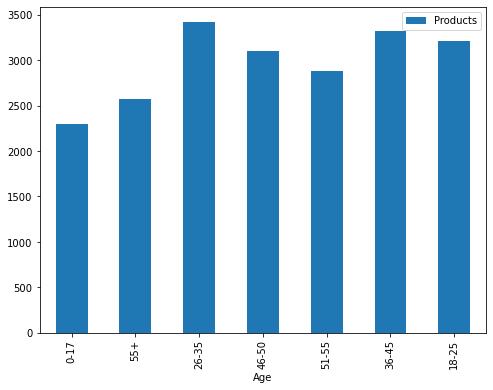

In [151]:
data.plot.bar(x = 'Age', figsize = (8,6))

<AxesSubplot:xlabel='Age'>

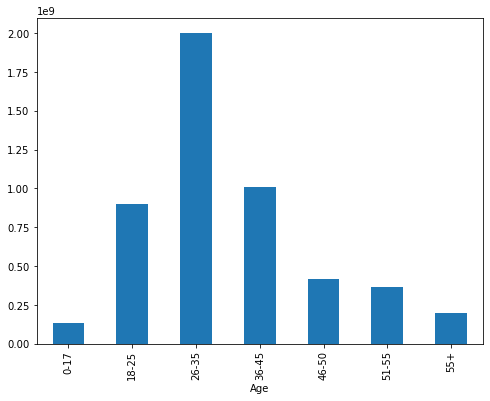

In [153]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar',
                                        figsize = (8,6))

<AxesSubplot:ylabel='Purchase'>

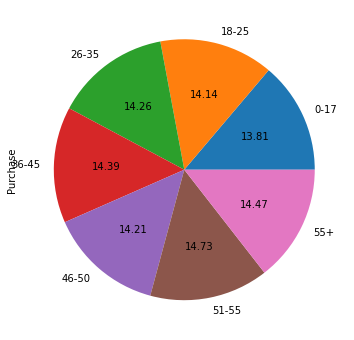

In [156]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie',
                                        figsize = (8,6),
                                        autopct = "%.2f")

<AxesSubplot:ylabel='None'>

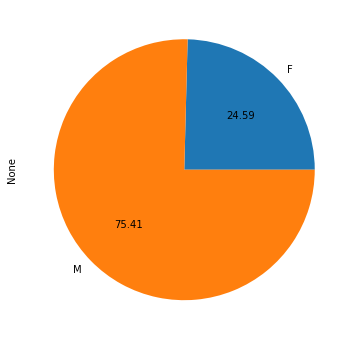

In [158]:
df.groupby('Gender').size().plot(kind = 'pie',
                                        figsize = (8,6),
                                        autopct = "%.2f")

<AxesSubplot:ylabel='None'>

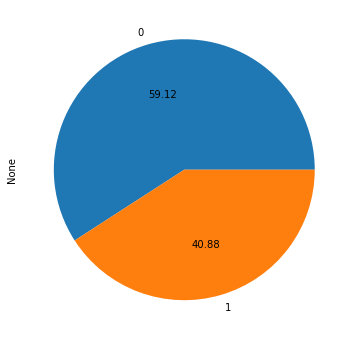

In [159]:
df.groupby('Marital_Status').size().plot(kind = 'pie',
                                        figsize = (8,6),
                                        autopct = "%.2f")

# Multi Column Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

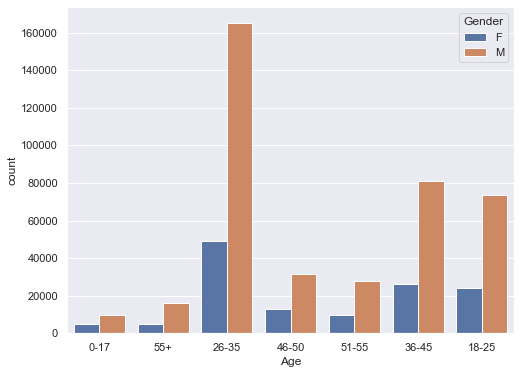

In [170]:
sns.set(rc = {'figure.figsize' : (8,6)})
sns.countplot(x = 'Age' ,hue = 'Gender' , data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

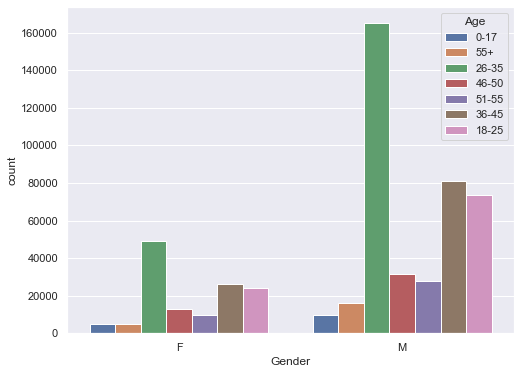

In [172]:
sns.set (rc = {'figure.figsize' : (8,6)})
sns.countplot ( x= 'Gender', hue = 'Age', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

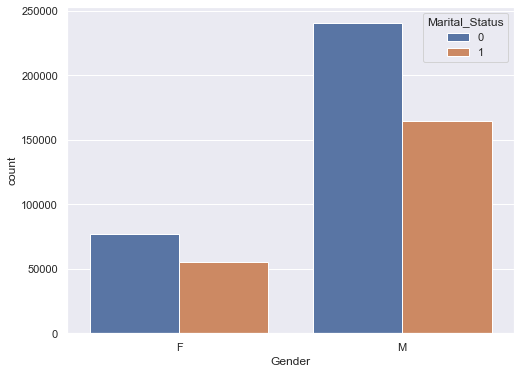

In [175]:
sns.set(rc = {'figure.figsize' : (8,6)})
sns.countplot(x = 'Gender' , hue = 'Marital_Status', data  = df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

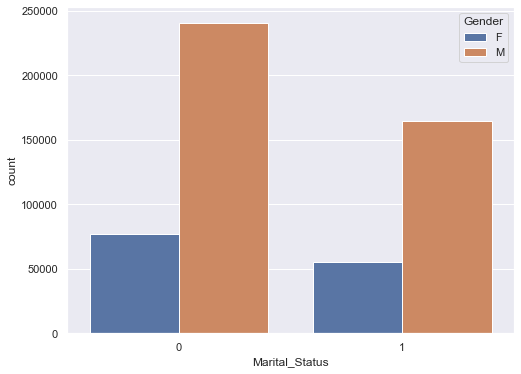

In [176]:
sns.set(rc = {'figure.figsize' : (8,6)})
sns.countplot(x = 'Marital_Status' , hue = 'Gender', data  = df)

In [178]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:xlabel='City_Category', ylabel='count'>

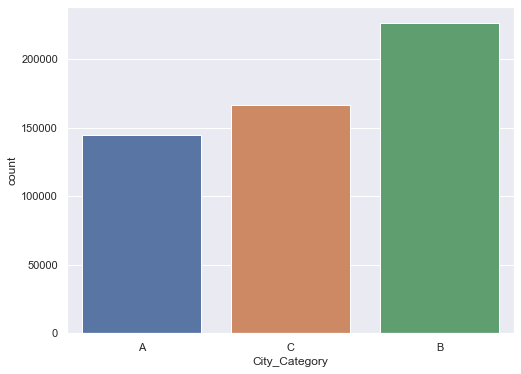

In [188]:
sns.countplot(x = df['City_Category'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

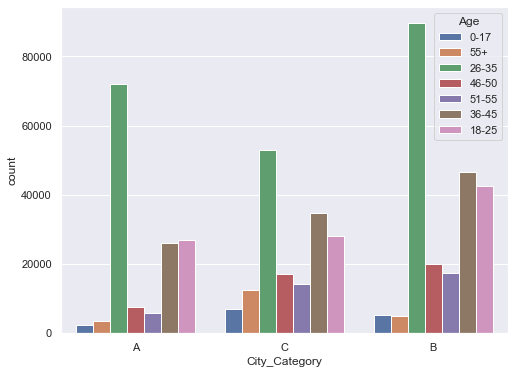

In [192]:
sns.countplot(x = 'City_Category', hue = 'Age' , data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

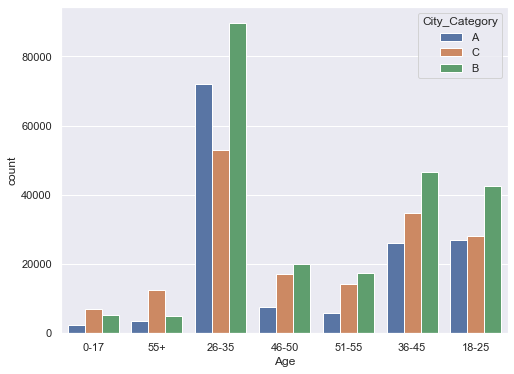

In [193]:
sns.countplot(x = 'Age', hue = 'City_Category' , data = df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

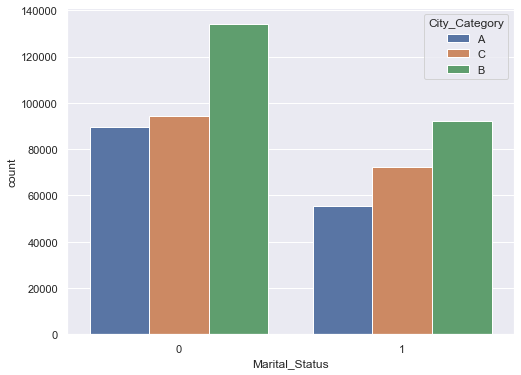

In [194]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category' , data = df)

<AxesSubplot:ylabel='None'>

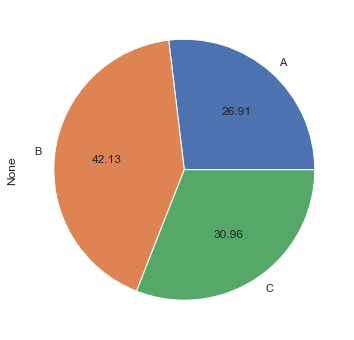

In [189]:
df.groupby('City_Category').size().plot(kind = "pie",
                                       figsize = (8,6),
                                       autopct = "%.2f")

<AxesSubplot:xlabel='City_Category', ylabel='count'>

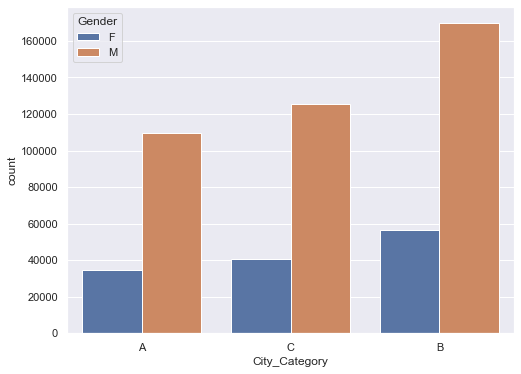

In [195]:
sns.countplot(x = 'City_Category', hue = 'Gender' , data = df)

<AxesSubplot:ylabel='Purchase'>

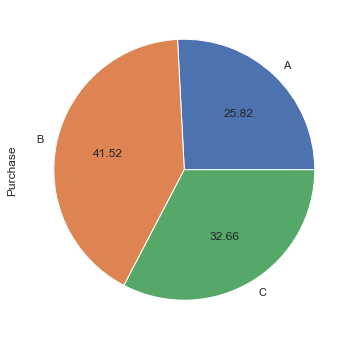

In [201]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie',
                                                  figsize = (8,6),autopct = "%.2f")

<AxesSubplot:ylabel='Purchase'>

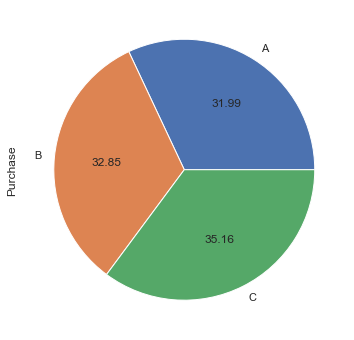

In [202]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie',
                                                  figsize = (8,6),autopct = "%.2f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

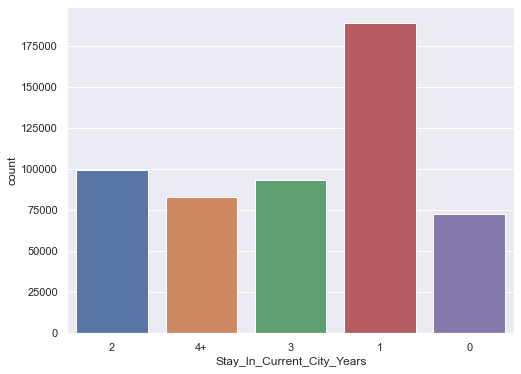

In [206]:
sns.countplot(x =df['Stay_In_Current_City_Years'])


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

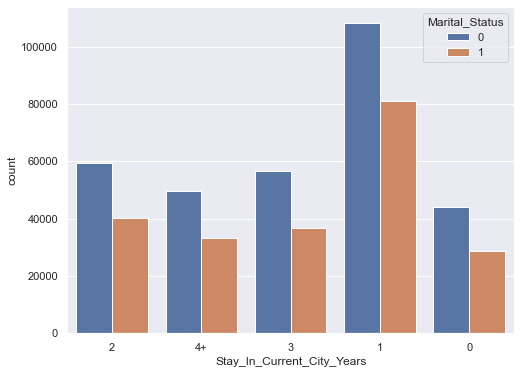

In [207]:
sns.countplot(x ='Stay_In_Current_City_Years', hue = 'Marital_Status' ,data = df)

<AxesSubplot:ylabel='None'>

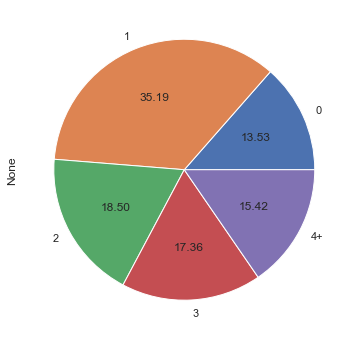

In [211]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie',
                                                    figsize = (8,6),autopct = "%.2f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

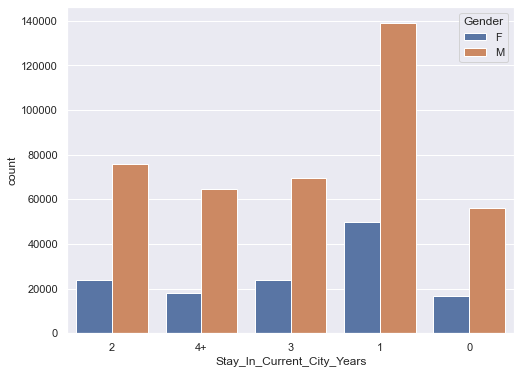

In [208]:
sns.countplot(x ='Stay_In_Current_City_Years', hue = 'Gender' ,data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

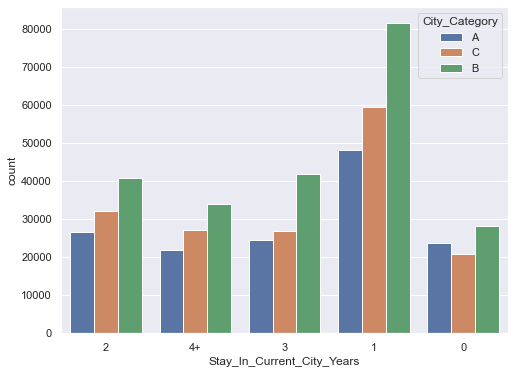

In [210]:
sns.countplot(x ='Stay_In_Current_City_Years', hue = 'City_Category' ,data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

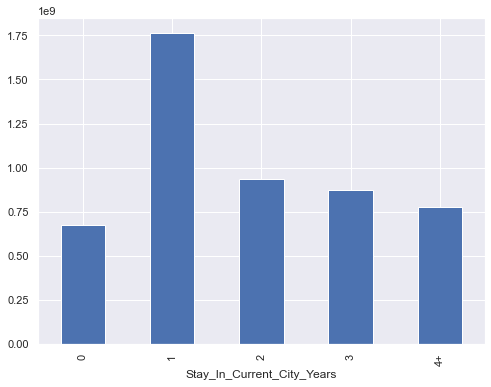

In [216]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar',
                                                    figsize = (8,6))

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

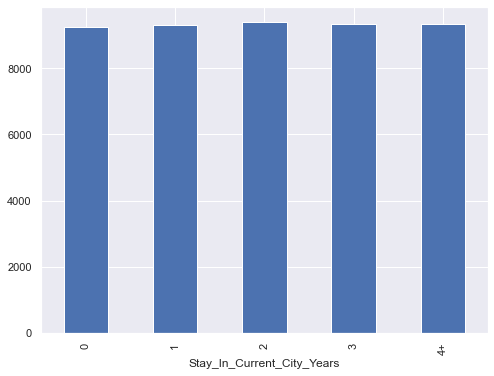

In [215]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar',
                                                    figsize = (8,6))

#  Analyzing Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

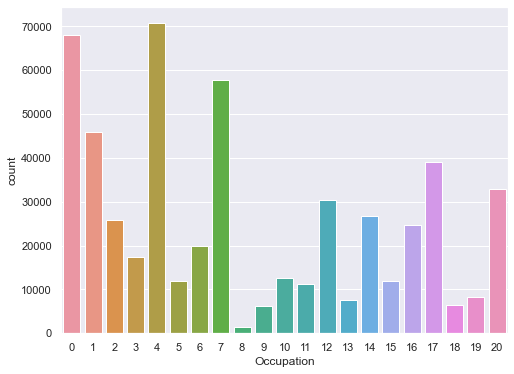

In [217]:
sns.countplot(x = df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

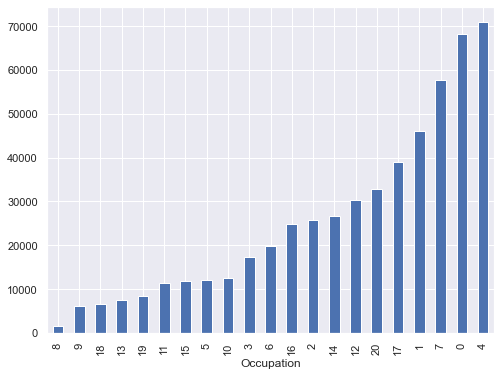

In [220]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Occupation'>

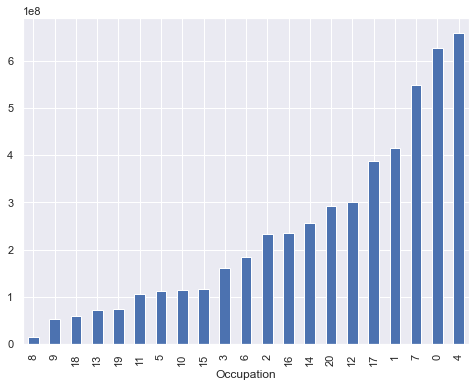

In [222]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

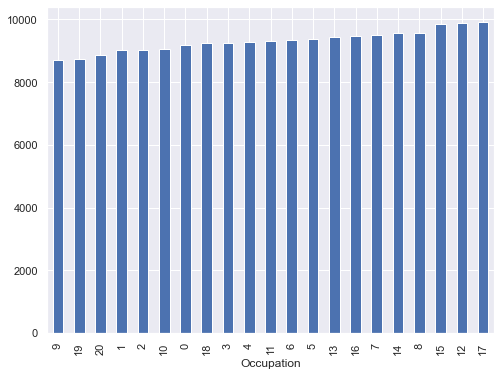

In [223]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

In [224]:
df.groupby('Occupation').mean()['Purchase'].sort_values()

Occupation
9     8714.335934
19    8754.249162
20    8881.099514
1     9017.703095
2     9025.938982
10    9052.836410
0     9186.946726
18    9233.671418
3     9238.077277
4     9279.026742
11    9299.467190
6     9336.378620
5     9388.848978
13    9424.449391
16    9457.133118
7     9502.175276
14    9568.536426
8     9576.508530
15    9866.239925
12    9883.052460
17    9906.378997
Name: Purchase, dtype: float64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

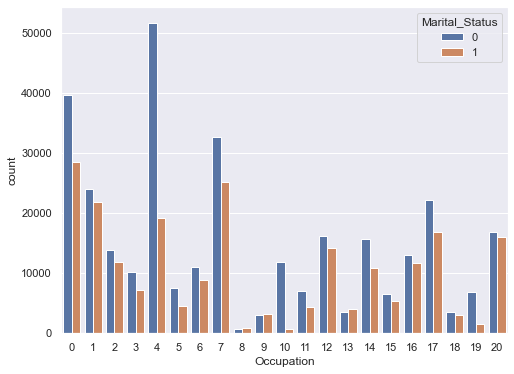

In [225]:
sns.countplot(x = df['Occupation'] , hue ='Marital_Status', data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

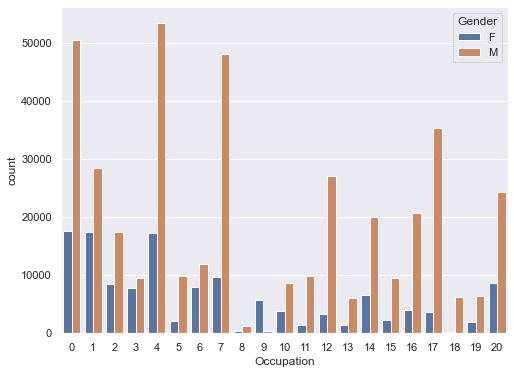

In [226]:
sns.countplot(x = df['Occupation'] , hue ='Gender', data = df)

<AxesSubplot:xlabel='Occupation'>

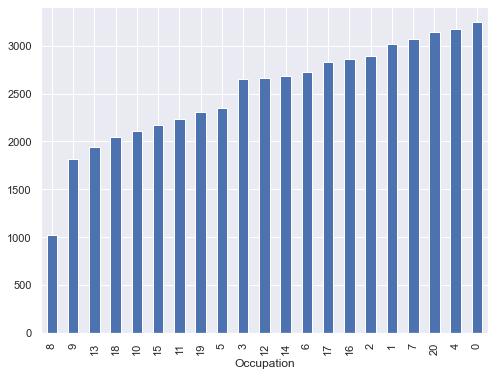

In [228]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

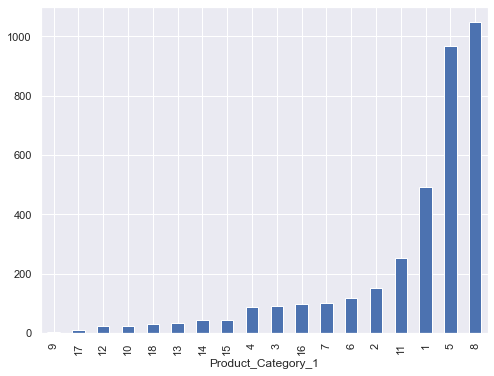

In [233]:
df.groupby('Product_Category_1').nunique()['Product_ID'].sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_Category_1'>

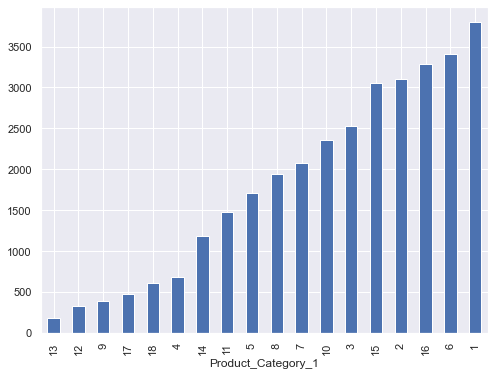

In [234]:
df.groupby('Product_Category_1').nunique()['Purchase'].sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_Category_1'>

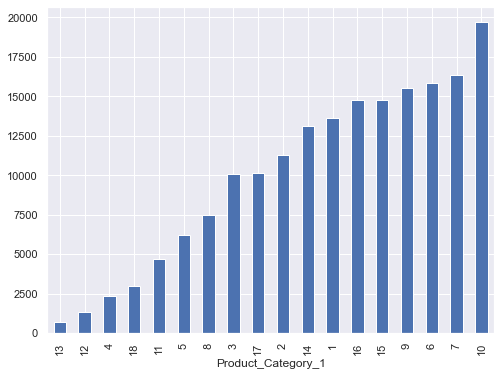

In [235]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_ID'>

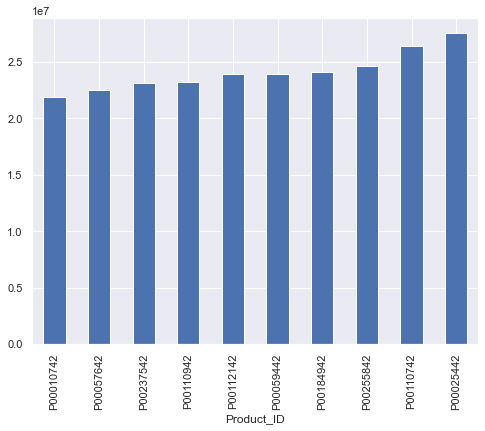

In [237]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

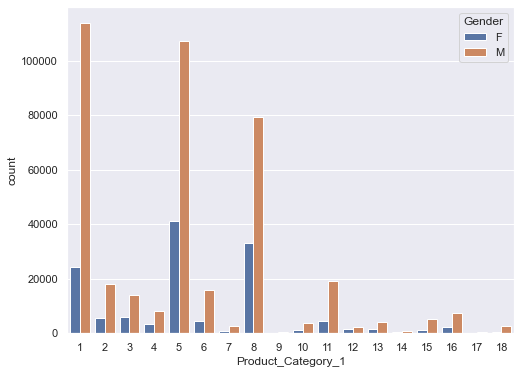

In [242]:
sns.countplot(x = 'Product_Category_1', hue ='Gender', data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

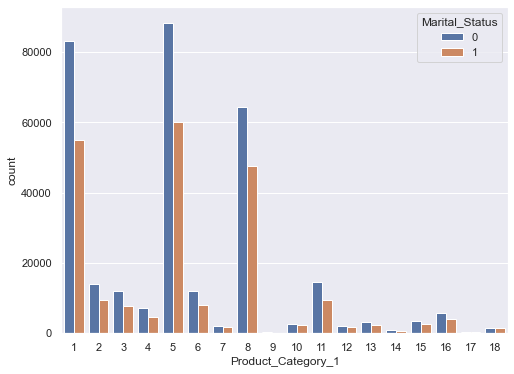

In [243]:
sns.countplot(x = 'Product_Category_1', hue ='Marital_Status', data = df)

 # Combining Gender & Marital Status

In [254]:
l =[]
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))


In [256]:
df['Marital_Gender']=l

<AxesSubplot:xlabel='Marital_Gender', ylabel='count'>

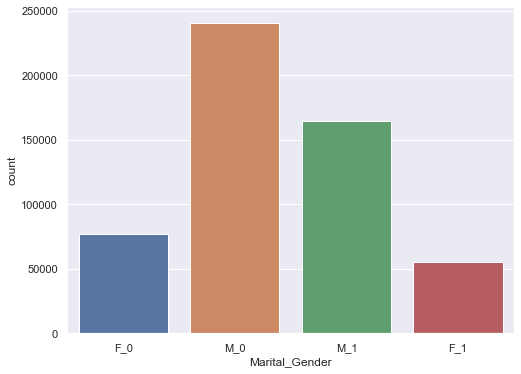

In [258]:
sns.countplot(x = df['Marital_Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

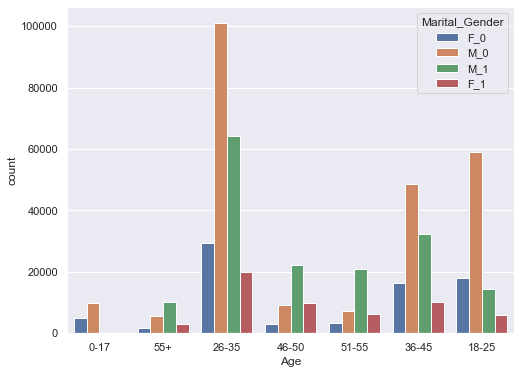

In [259]:
sns.countplot(x = df['Age'], hue = df['Marital_Gender'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

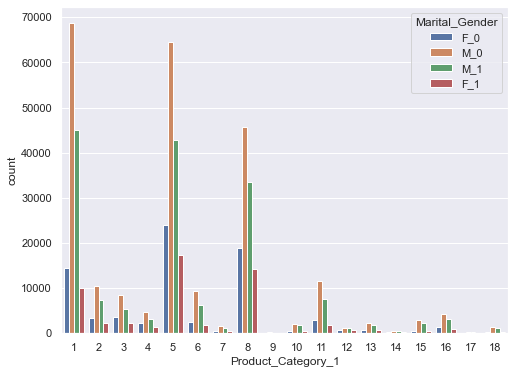

In [260]:
sns.countplot(x = df['Product_Category_1'], hue = df['Marital_Gender'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

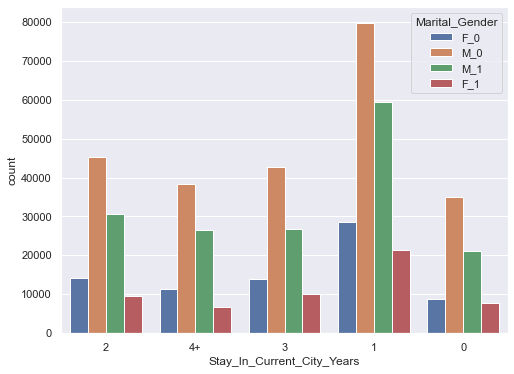

In [264]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Marital_Gender'])


<AxesSubplot:xlabel='City_Category', ylabel='count'>

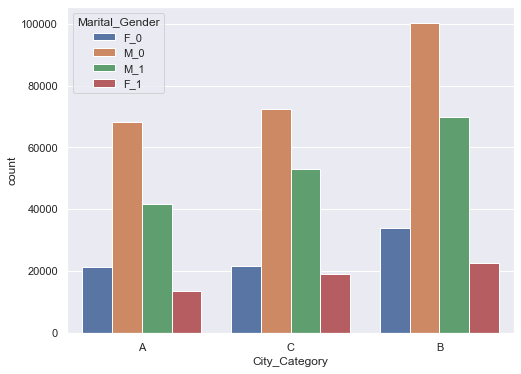

In [267]:
sns.countplot(x = df['City_Category'], hue = df['Marital_Gender'])


# Conclusion:
•So from scratch we have analyzed the things,about these two columns we have made a new column based on their gender and marital status, we have combined the data to make a new column and based on that we have analyzed:


•Men Unmarried are spending the most in Black Friday then comes Men married, then comes Female Unmarried, then comes Female married.

•So We will promote our products in the same manner, so we are going to spend the most amount in our promotion to the male candidates who are unmarried because they are going to spent the most, followed by Men married, Female Unmarried and the Female married.